In [29]:
import pandas as pd
import numpy as np
from natsort import natsorted
import os

TC = 180

base_path = f'{TC}s'
aw_values = range(25, 151, 25)
agents = ['1_agent','2_agents','4_agents','6_agents','8_agents','12_agents']
agent_n = [1,2,4,6,8,12]
maps_old = ['DIAG_floor1','cumberland','example','grid']
datasets_old = {}

for map in maps_old:
    for i, agent in enumerate(agents):
        averages = np.zeros((30,3))
        probabilities = np.zeros((5,6))
        dtag_folder_path = f'{base_path}/dtag/{map}/{agent}/dtag_{map}_{agent_n[i]}_all.csv'
        dtap_folder_path = f'{base_path}/dtap/{map}/{agent}/dtap_{map}_{agent_n[i]}_all.csv'
        cbls_folder_path = f'{base_path}/cbls/{map}/{agent}/cbls_{map}_{agent_n[i]}_all.csv'
        cbls_m_folder_path = f'{base_path}/cbls_m/{map}/{agent}/cbls_m_{map}_{agent_n[i]}_all.csv'
        sebs_folder_path = f'{base_path}/sebs/{map}/{agent}/sebs_{map}_{agent_n[i]}_all.csv'

        dtag = pd.read_csv(dtag_folder_path, sep=';', header=None)
        dtap = pd.read_csv(dtap_folder_path, sep=';', header=None)
        cbls = pd.read_csv(cbls_folder_path, sep=';', header=None)
        cbls_m = pd.read_csv(cbls_m_folder_path, sep=';', header=None)
        sebs = pd.read_csv(sebs_folder_path, sep=';', header=None)

        result_concatenated = pd.concat([dtag, dtap, cbls, cbls_m, sebs], axis=0)
        dataset = result_concatenated.to_numpy()
        N = int(len(dataset[0,:])/6)
        for j in range(len(dataset)):
            averages[j,:] = [sum(dataset[j,0:N])/N,sum(dataset[j,N*2:N*3])/N,sum(dataset[j,N*4:N*5])/N]
            probabilities[j//6,j%6] = max([sum(dataset[j,0:N])/N,sum(dataset[j,N*2:N*3])/N,sum(dataset[j,N*4:N*5])/N])
        # dataset = np.reshape(dataset, (5, 3, -1, 20))

        # Store the dataset in the dictionary with the AW value as the key
        datasets_old[f'{map}_{agent}'] = probabilities

def read_and_concatenate_data(folder_path):
    result = pd.DataFrame()

    for dirpath, dirnames, filenames in os.walk(folder_path):
        filenames = natsorted(filenames)
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # Check if the item is a file and ends with '.txt'
            if os.path.isfile(file_path) and filename.endswith('.txt'):
                # Read the text file into a DataFrame
                df = pd.read_csv(file_path, sep=';', header=None)
                # Concatenate the current DataFrame with the result
                result = pd.concat([result, df], axis=1, ignore_index=True)

    return result

base_path = f'final_Results_{TC}/results_TC{TC}_AW'
aw_values = range(25, 151, 25)
datasets = {}

for aw in aw_values:
    dtag_folder_path = f'{base_path}{aw}/dtag_script_results/'
    dtap_folder_path = f'{base_path}{aw}/dtap_script_results/'
    cbls_folder_path = f'{base_path}{aw}/cbls_script_results/'
    cbls_m_folder_path = f'{base_path}{aw}/cbls_m_script_results/'
    sebs_folder_path = f'{base_path}{aw}/sebs_script_results/'

    dtag = read_and_concatenate_data(dtag_folder_path)
    dtap = read_and_concatenate_data(dtap_folder_path)
    cbls = read_and_concatenate_data(cbls_folder_path)
    cbls_m = read_and_concatenate_data(cbls_m_folder_path)
    sebs = read_and_concatenate_data(sebs_folder_path)

    result_concatenated = pd.concat([dtag, dtap, cbls, cbls_m, sebs], axis=0)
    dataset = result_concatenated.to_numpy()
    dataset = np.reshape(dataset, (5, 3, -1, 20))

    # Store the dataset in the dictionary with the AW value as the key
    datasets[aw] = dataset



legend_fontsize = 14
axis_fontsize = 16
tick_fontsize = 12




In [30]:
import numpy as np

# Assuming 'maps' and 'agents' are defined lists
# Assuming 'datasets' is a dictionary containing numpy arrays

# Initialize the AW_average array
AW_average_old = np.zeros((5, 6))
success_probabilities_old = np.zeros((5,6))

# Iterate through each map and agent
for j, map in enumerate(maps_old):
    for i, agent in enumerate(agents):
        # Retrieve the dataset for the current map and agent
        temp = datasets_old[f'{map}_{agent}']
        for k, array in enumerate(temp):

            success_probabilities_old[k,i] += sum(array)/24

        # Update the AW_average array
        AW_average_old += temp / 24

# Output the final AW_average array
print((sum(success_probabilities_old.T)/6))
print((sum(sum(success_probabilities_old.T)))/30)

# print(((success_probabilities_old.T)/6))


[0.54991021 0.56505532 0.49800242 0.47249876 0.43917984]
0.5049293077265047


In [31]:
# dataset = datasets[25]
successful_counts_dict = {}
total_counts_dict = {}
all_successful_counts = np.zeros((5,4,6,3))
all_total_counts = np.zeros((5,4,6))
AW_average = np.zeros((5,6))
AW_diff_maps = np.zeros((5,4,6))
AW_counts = np.zeros((5,4,6))

AW_agents = np.zeros((5,4,6,6))
AW_agents_counts = np.zeros((5,4,6,6))


for k, aw in enumerate(aw_values):

    dataset = datasets[aw]  
    successful_counts = np.zeros((5,4,6,3))
    total_counts = np.zeros((5,4,6))

    for algo in range(5):
        for j, data in enumerate(dataset[algo,2,:,:]):
            for i in range(len(data)):
                if data[i] == 1:

                    AW_diff_maps[algo, j//18, k] += 1
                    AW_counts[algo, j//18, k] += 1

                    AW_agents[algo, j//18, j%18//3, k] += 1
                    AW_agents_counts[algo, j//18, j%18//3, k] += 1

                    all_successful_counts[algo,j//18,j%18//3,0] += 1
                    successful_counts[algo,j//18,j%18//3,0] += 1
                    total_counts[algo,j//18,j%18//3] += 1
                    all_total_counts[algo,j//18,j%18//3] += 1

                elif (data[i] == 0):

                    AW_counts[algo, j//18, k] += 1

                    AW_agents_counts[algo, j//18, j%18//3, k] += 1

                    all_successful_counts[algo,j//18,j%18//3,1] += 1
                    successful_counts[algo,j//18,j%18//3,1] += 1
                    total_counts[algo,j//18,j%18//3] += 1
                    all_total_counts[algo,j//18,j%18//3] += 1

                elif (data[i] == -1):

                    AW_counts[algo, j//18, k] += 1
                    
                    AW_agents_counts[algo, j//18, j%18//3, k] += 1

                    all_successful_counts[algo,j//18,j%18//3,2] += 1
                    successful_counts[algo,j//18,j%18//3,2] += 1
                    total_counts[algo,j//18,j%18//3] += 1
                    all_total_counts[algo,j//18,j%18//3] += 1

            # print(sum(sum(successful_counts[algo, :, :, 0])))
            # print(sum(sum(total_counts[algo, :, :])))

        AW_average[algo, k] = sum(sum(successful_counts[algo, :, :, 0])) / sum(sum(total_counts[algo, :, :]))
    successful_counts_dict[aw] = successful_counts
    total_counts_dict[aw] = total_counts



In [32]:
dataset = datasets[100]
dataset.shape

successful_counts = np.zeros((5,4))

for algo in range(5):
    for j, data in enumerate(dataset[algo,2,:,:]):
        # if (algo == 3)&(j//18 == 3):
        #     print(data)
        for i in range(len(data)):
            if data[i] == 1:
                successful_counts[algo,j//18] += 1
            elif (data[i] == 0):
                successful_counts[algo,j//18] += 1
            elif (data[i] == -1):
                successful_counts[algo,j//18] += 1

successful_counts

array([[360., 360., 360., 360.],
       [360., 360., 360., 340.],
       [360., 360., 360., 360.],
       [360., 360., 360., 360.],
       [360., 360., 360., 360.]])

In [33]:
# df = pd.DataFrame()

# for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
#    df = pd.concat(sum(all_successful_counts[j,:,:,0]) / sum(all_total_counts[j, :, :]))

# df
names =  [1,2,4,6,8,12]
maps = ['Diag', 'Cumberland', 'Example', 'Grid']


# Initialize an empty DataFrame
df = pd.DataFrame()
df['Agent count'] = [i for i in names]
df.set_index(['Agent count'])

# Iterate over the algorithms
for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS*', 'SEBS']):


    success_probability = sum(all_successful_counts[j,:,:,0]) / sum(all_total_counts[j, :, :])

    df[algo] = [i for i in success_probability]

# Display the DataFrame
print(sum(df.to_numpy().T[1:].T)/6)
print(sum(sum(df.to_numpy().T[1:].T))/30)

# print(df.to_numpy().T[1:].T)

for i, map in enumerate(maps):

    names =  [1,2,4,6,8,12]

    # Initialize an empty DataFrame
    df = pd.DataFrame()
    df['Agent count'] = [i for i in names]
    df.set_index(['Agent count'])

    # Iterate over the algorithms
    for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS*', 'SEBS']):


        success_probability = all_successful_counts[j,i,:,0] / all_total_counts[j, i, :]


        df[algo] = [l for l in success_probability]

    # Display the DataFrame
    # print(map)
    # print(df)

[0.40636574 0.38021886 0.57847222 0.37384259 0.36967593]
0.4217150673400674


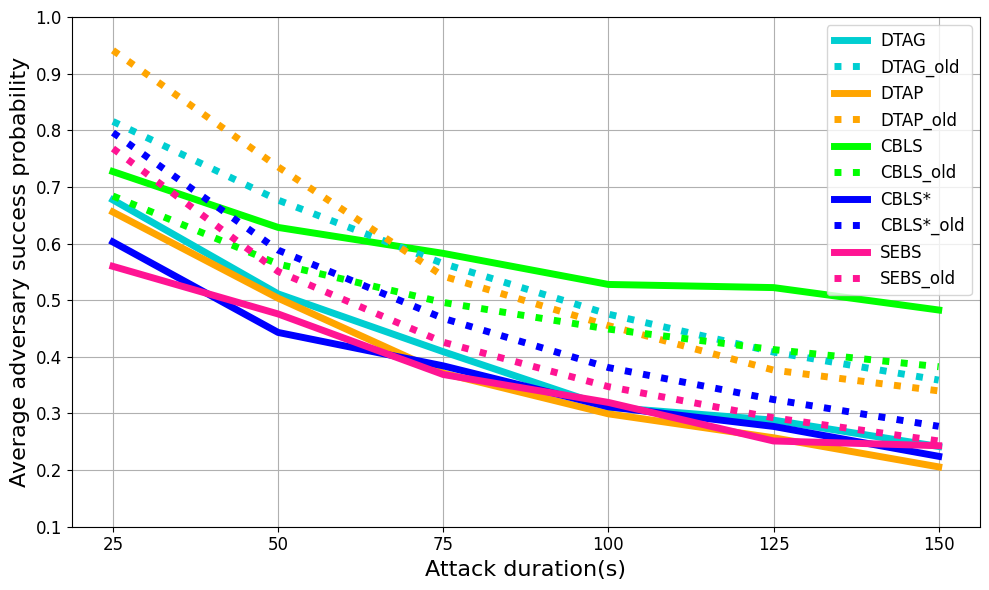

In [34]:
import matplotlib.pyplot as plt
import numpy as np

agents = np.arange(1, 7)

# colours = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725'] # ['#DABFFF', '#907AD6', '#4F518C', '#2C2A4A', '#7FDEFF']
colours = ['#00ced1', '#ffa500', '#00ff00', '#0000ff', '#ff1493']


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS*', 'SEBS']):
    # Iterate over each subplot and plot the data


    ax.plot(agents, AW_average[j,:], color=colours[j], label=algo, linewidth=5, zorder=2)
    ax.plot(agents, AW_average_old[j,:], color=colours[j], label=f'{algo}_old', linewidth=5, linestyle=':', zorder=3)


    # ax.plot(agents, AW_average_old[j,:], color=colours[j], label=algo, linewidth=5, linestyle='--')


ax.set_xticks(agents)
ax.set_xticklabels(['{:.0f}'.format(x) for x in range(25,151,25)])
main_legend = ax.legend(fontsize=legend_fontsize-2, loc='upper right')

ax.set_yticks(np.arange(0.1, 1.1, 0.1))
ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
 
ax.grid(zorder=1)


# Set the y-axis label for the left subplots
ax.set_ylabel('Average adversary success probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots
ax.set_xlabel('Attack duration(s)', fontsize=axis_fontsize)


plt.tight_layout()
plt.savefig(f'plots/average_success_probability_results_{TC}')
plt.show()
plt.close(fig)

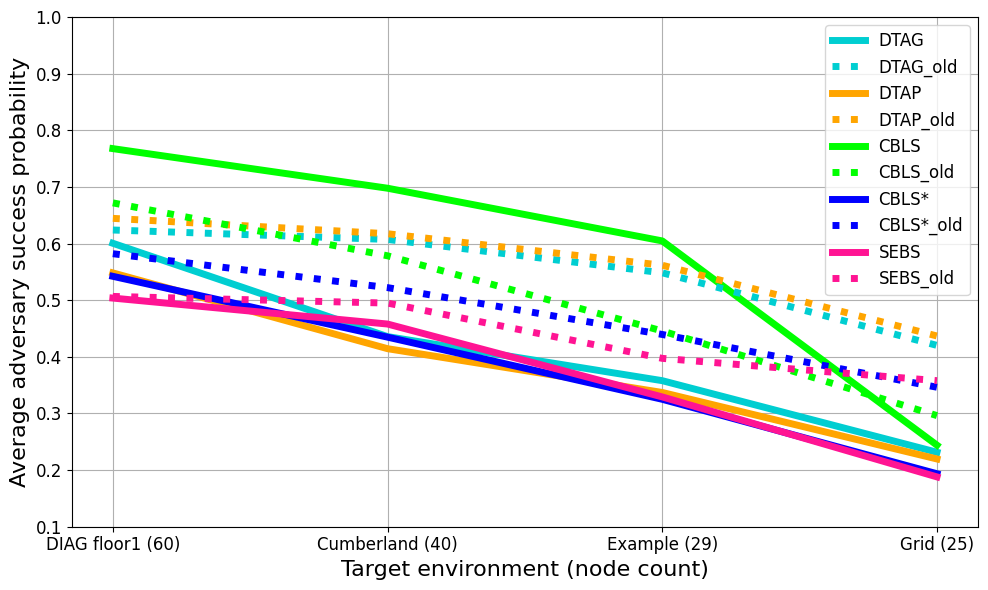

In [35]:
map_average_old = np.zeros((5,4))
names =  ['1_agent', '2_agents', '4_agents', '6_agents', '8_agents', '12_agents']
maps2 = ['DIAG floor1 (60)', 'Cumberland (40)', 'Example (29)', 'Grid (25)']

for j, map in enumerate(maps_old):
    for i, agent in enumerate(names):
        temp = datasets_old[f'{map}_{agent}']

        for k, array in enumerate(temp):
            map_average_old[k,j] += sum(array)/36

successful_counts = np.zeros((5,4))
map_counts = np.zeros((5,4))
for aw in aw_values:
    dataset = datasets[aw]
    
    for algo in range(5):
        for j, data in enumerate(dataset[algo,2,:,:]):
            # if (algo == 3)&(j//18 == 3):
            #     print(data)
            for i in range(len(data)):
                if data[i] == 1:
                    map_counts[algo,j//18] += 1
                    successful_counts[algo,j//18] += 1
                elif (data[i] == 0):
                    successful_counts[algo,j//18] += 1
                elif (data[i] == -1):
                    successful_counts[algo,j//18] += 1


map_average = map_counts/successful_counts
# print(map_average_old)
# print(map_average)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS*', 'SEBS']):
    # Iterate over each subplot and plot the data


    ax.plot(maps2, map_average[j,:], color=colours[j], label=algo, linewidth=5, zorder=2)
    ax.plot(maps2, map_average_old[j,:], color=colours[j], label=f'{algo}_old', linewidth=5, linestyle=':', zorder=3)


    # ax.plot(agents, AW_average_old[j,:], color=colours[j], label=algo, linewidth=5, linestyle='--')


# ax.set_xticks(agents)
# ax.set_xticklabels(['{:.0f}'.format(x) for x in range(25,151,25)])
main_legend = ax.legend(fontsize=legend_fontsize-2, loc='upper right')

ax.set_yticks(np.arange(0.1, 1.1, 0.1))
ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
 
ax.grid(zorder=1)


# Set the y-axis label for the left subplots
ax.set_ylabel('Average adversary success probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots
ax.set_xlabel('Target environment (node count)', fontsize=axis_fontsize)


plt.tight_layout()
plt.savefig(f'plots/map_success_probability_results_{TC}')
plt.show()
plt.close(fig)

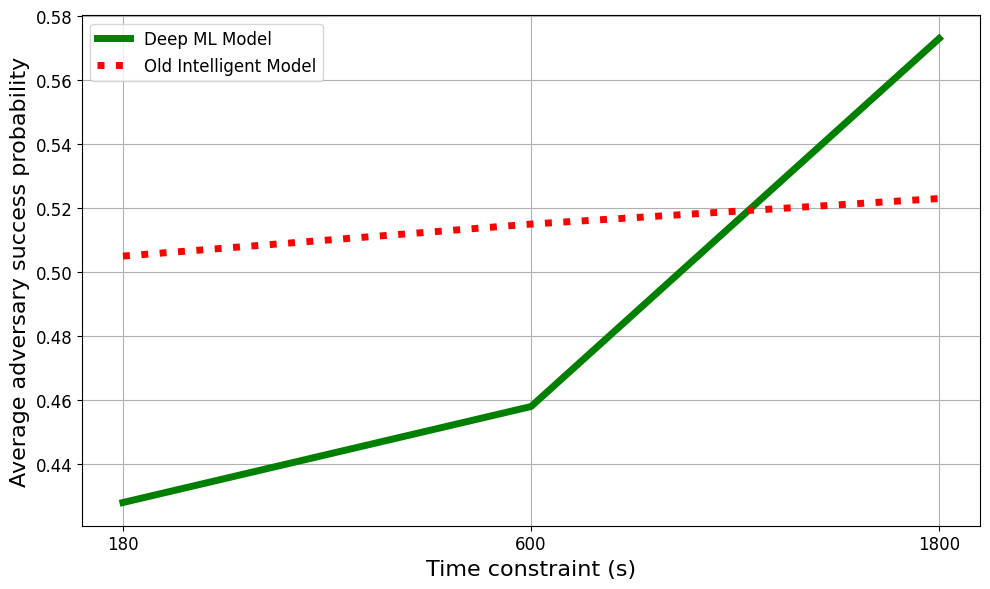

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharex=True, sharey=True)


ax.plot(['180','600','1800'], [0.428,0.458,0.573], color='g', label='Deep ML Model', linewidth=5, zorder=2)
ax.plot(['180','600','1800'], [0.505,0.515,0.523], color='r', label='Old Intelligent Model', linewidth=5, linestyle=':', zorder=3)


main_legend = ax.legend(fontsize=legend_fontsize-2, loc='upper left')

# ax.set_yticks(np.arange(0.1, 1.1, 0.1))
# ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
 
ax.grid(zorder=1)


# Set the y-axis label for the left subplots
ax.set_ylabel('Average adversary success probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots
ax.set_xlabel('Time constraint (s)', fontsize=axis_fontsize)


plt.tight_layout()
plt.show()
plt.close(fig)

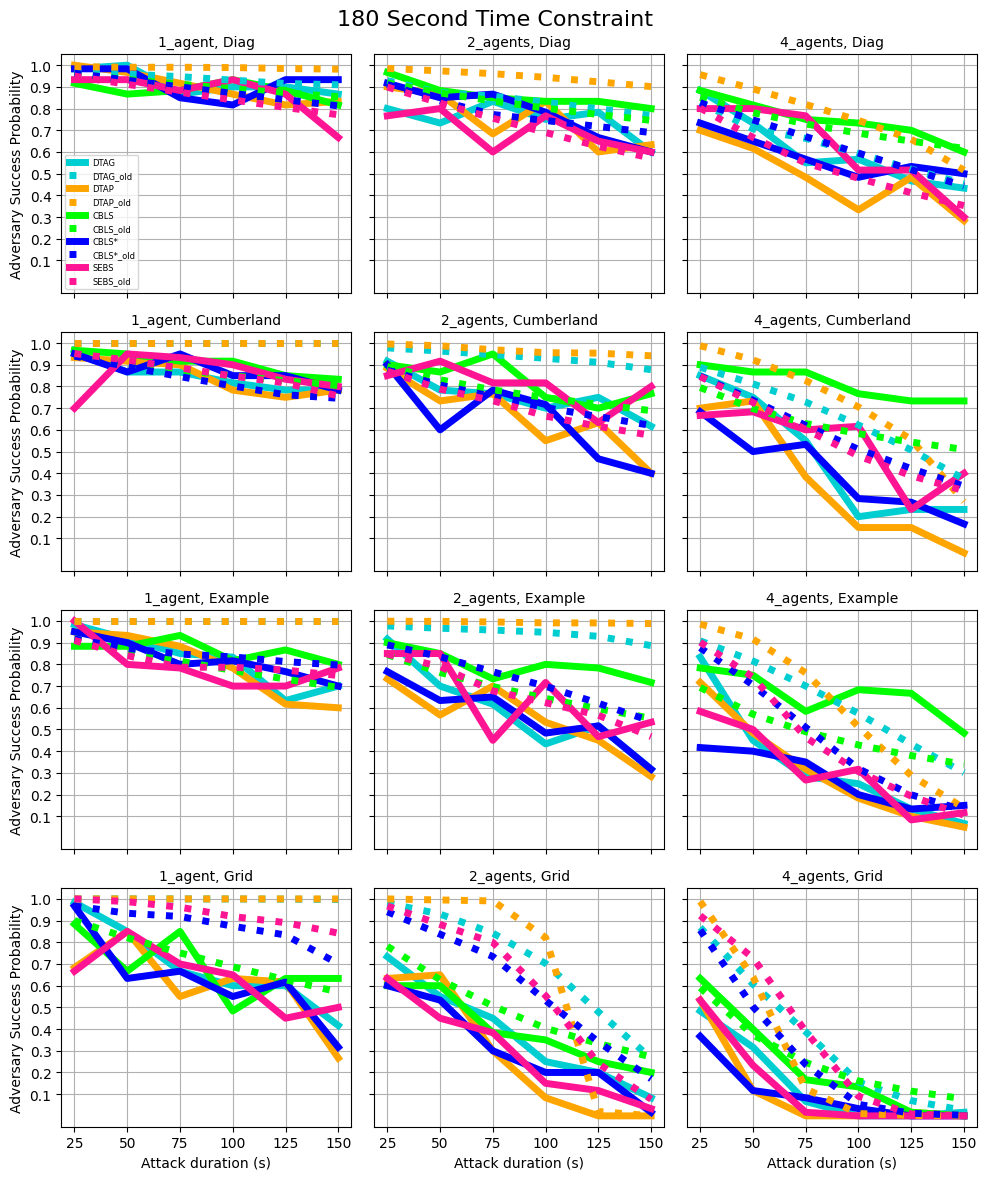

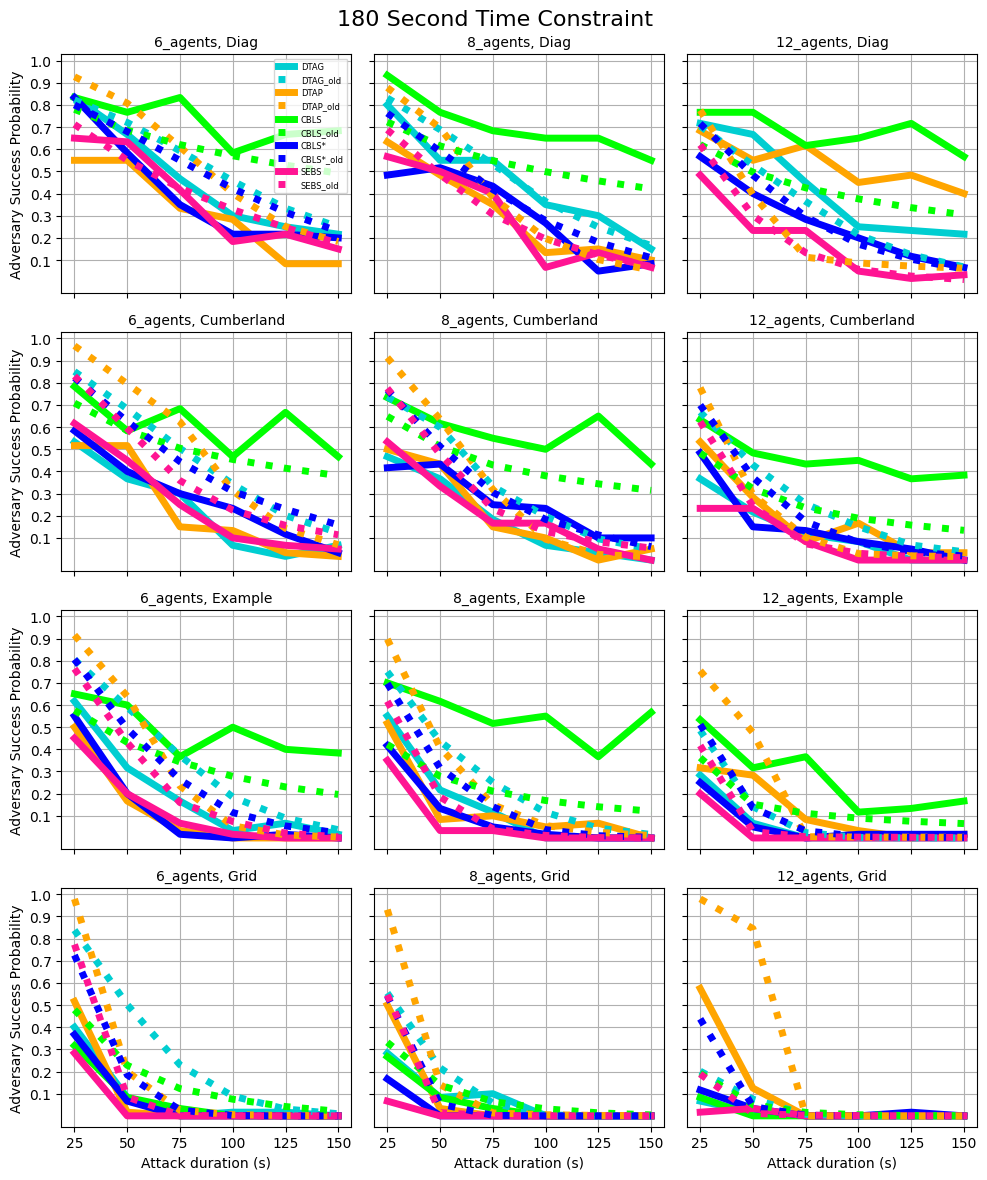

In [37]:
import matplotlib.pyplot as plt
import numpy as np

axis_fontsize2 = 10
tick_fontsize2 = 10
legend_fontsize2 = 6


agents = np.arange(1, 7)
maps = ['Diag', 'Cumberland', 'Example', 'Grid']
names =  ['1_agent', '2_agents', '4_agents', '6_agents', '8_agents', '12_agents']



for l in range(2):
# Create subplots
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 12), sharex=True, sharey=True)

    for k, aw in enumerate(aw_values[l*3:l*3+3]):

        # Iterate over each subplot and plot the data
        for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS*', 'SEBS']):
            # Iterate over each subplot and plot the data
            for i, map in enumerate(maps):
                old_plot = datasets_old[f'{maps_old[i]}_{names[k%3+(l*3)]}']

                col, row = divmod(i, 4)
                ax = axes[row, col+k%3]

                ax.plot(agents, AW_agents[j, i, k%3+(l*3), :] / AW_agents_counts[j, i, k%3+(l*3),:], color=colours[j], label=algo, linewidth=5,zorder=2)
                ax.plot(agents, old_plot[j,:], color=colours[j], label=f'{algo}_old', linewidth=5,linestyle=':',zorder=3)


                ax.set_title(f'{names[k%3+(l*3)]}, {map}', fontsize=axis_fontsize2)
                ax.set_xticks(agents)
                ax.set_xticklabels(['{:.0f}'.format(x) for x in range(25,151,25)])
                if (row==0)&(col+k%3==0):
                    ax.legend(fontsize=legend_fontsize2)
                ax.set_yticks(np.arange(0.1, 1.1, 0.1))
                ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

                ax.tick_params(axis='both', which='major', labelsize=tick_fontsize2)
                ax.grid(zorder=1)
                
                # fig.suptitle(f'{map}, {names[k]}', fontsize=axis_fontsize)




    axes[0, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize2)
    axes[1, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize2)
    axes[2, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize2)
    axes[3, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize2)

    # Set the x-axis label for the bottom subplots

    axes[3, 0].set_xlabel('Attack duration (s)', fontsize=axis_fontsize2)
    axes[3, 1].set_xlabel('Attack duration (s)', fontsize=axis_fontsize2)
    axes[3, 2].set_xlabel('Attack duration (s)', fontsize=axis_fontsize2)

    fig.suptitle(f'{TC} Second Time Constraint', fontsize=16)
    plt.grid
    plt.tight_layout()  
    if l == 0:
        save_path = os.path.join('plots', f'{TC}_success_prob_lower.png')
    else:
        save_path = os.path.join('plots', f'{TC}_success_prob_upper.png')
    plt.savefig(save_path)
    plt.show()
    plt.close(fig)




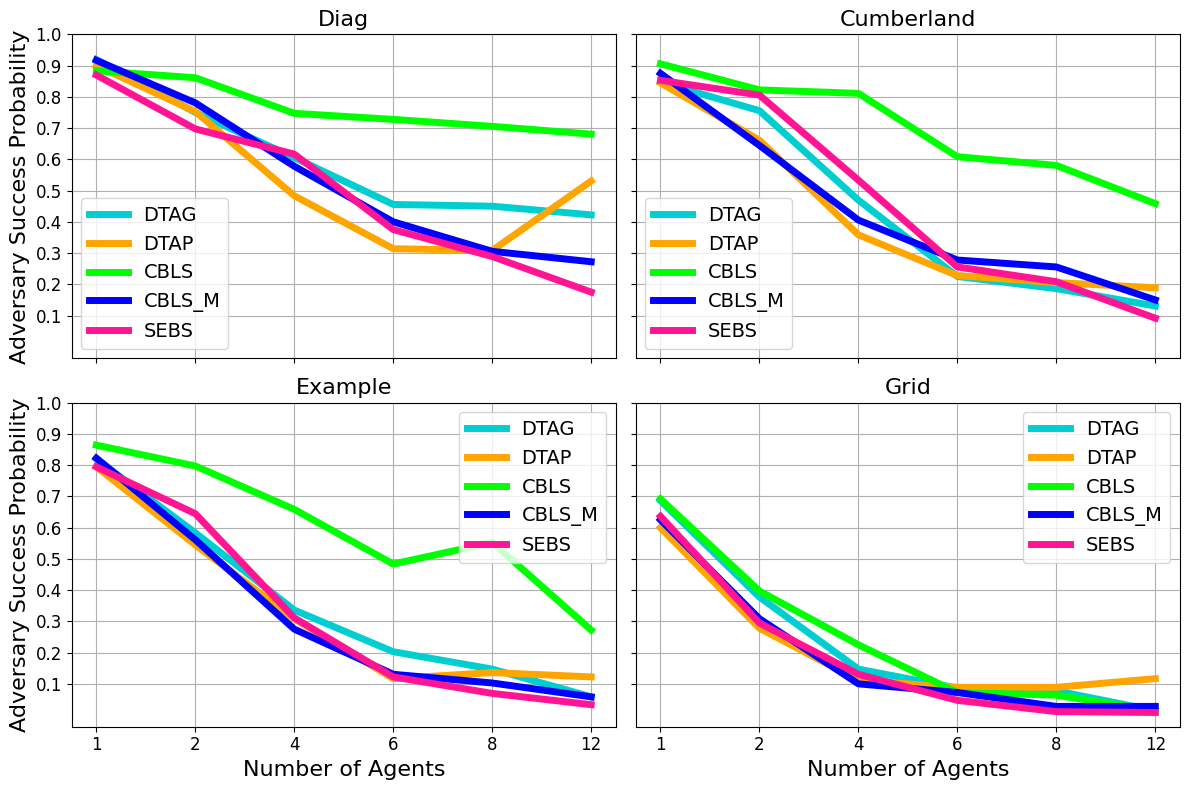

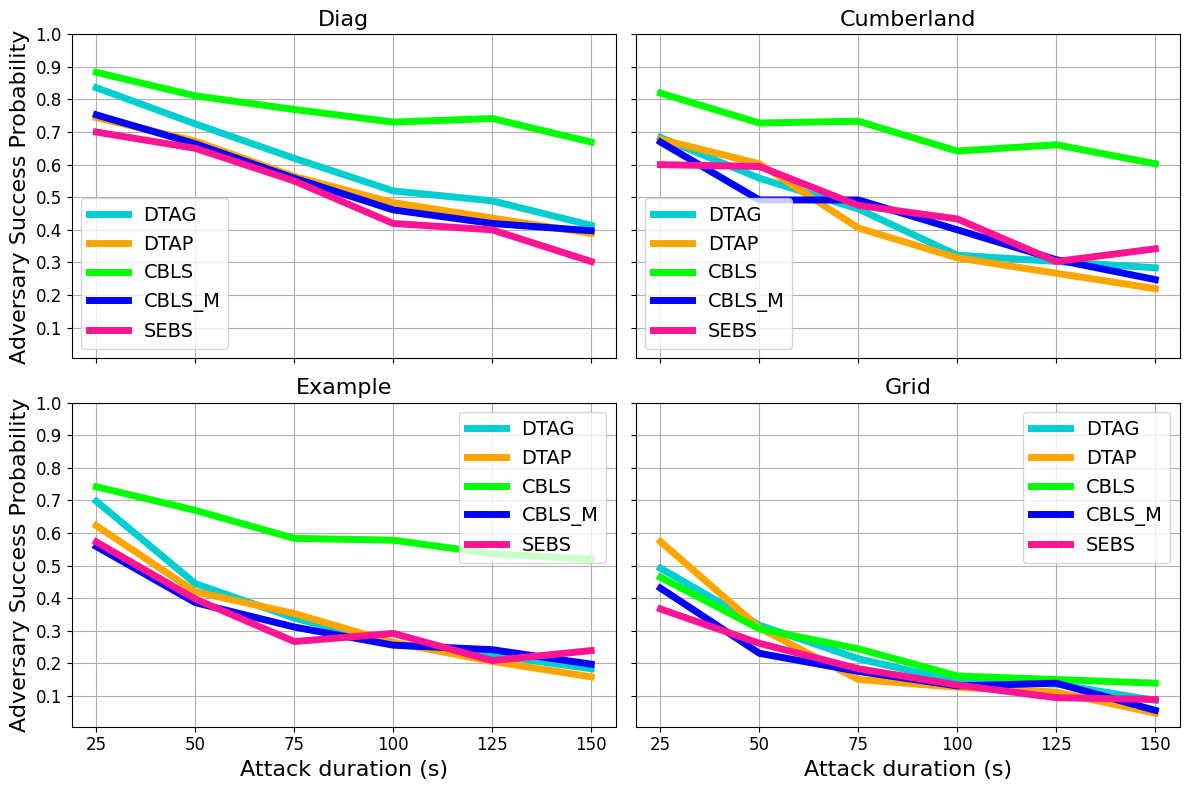

[155.  83.  63.  47.  50.  20.]
[360. 360. 360. 360. 360. 360.]


In [38]:
import matplotlib.pyplot as plt
import numpy as np

agents = np.arange(1, 7)
maps = ['Diag', 'Cumberland', 'Example', 'Grid']


# Create subplots with shared x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        ax.plot(agents, all_successful_counts[j, i, :, 0] / all_total_counts[j, i, :], color=colours[j], label=algo, linewidth=5)

        ax.set_title(map, fontsize=axis_fontsize)
        ax.set_xticks(agents)
        ax.set_xticklabels(['1', '2', '4', '6', '8', '12'])
        ax.legend(fontsize=legend_fontsize)
        ax.set_yticks(np.arange(0.1, 1.1, 0.1))
        ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

        ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
        ax.grid()

# Set the y-axis label for the left subplots
axes[0, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)
axes[1, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots

axes[1, 0].set_xlabel('Number of Agents', fontsize=axis_fontsize)
axes[1, 1].set_xlabel('Number of Agents', fontsize=axis_fontsize)


plt.tight_layout()
plt.show()

# Create subplots with shared x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        ax.plot(agents, AW_diff_maps[j, i, :] / AW_counts[j, i, :], color=colours[j], label=algo, linewidth=5)

        ax.set_title(map, fontsize=axis_fontsize)
        ax.set_xticks(agents)
        ax.set_xticklabels(['{:.0f}'.format(x) for x in range(25,151,25)])
        ax.legend(fontsize=legend_fontsize)
        ax.set_yticks(np.arange(0.1, 1.1, 0.1))
        ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

        ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
        ax.grid()

# Set the y-axis label for the left subplots
axes[0, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)
axes[1, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots

axes[1, 0].set_xlabel('Attack duration (s)', fontsize=axis_fontsize)
axes[1, 1].set_xlabel('Attack duration (s)', fontsize=axis_fontsize)

plt.tight_layout()
plt.show()
print(AW_diff_maps[3,3,:])
print(AW_counts[3,3,:])


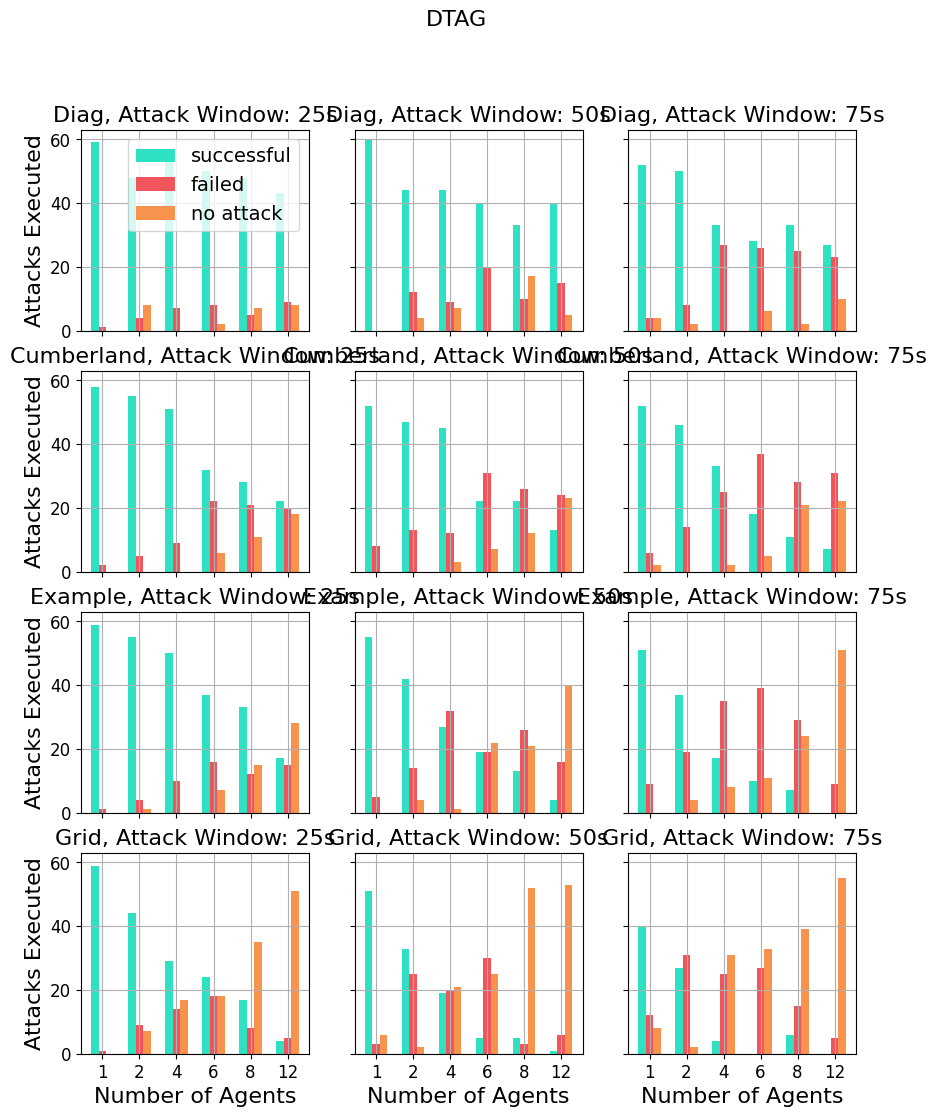

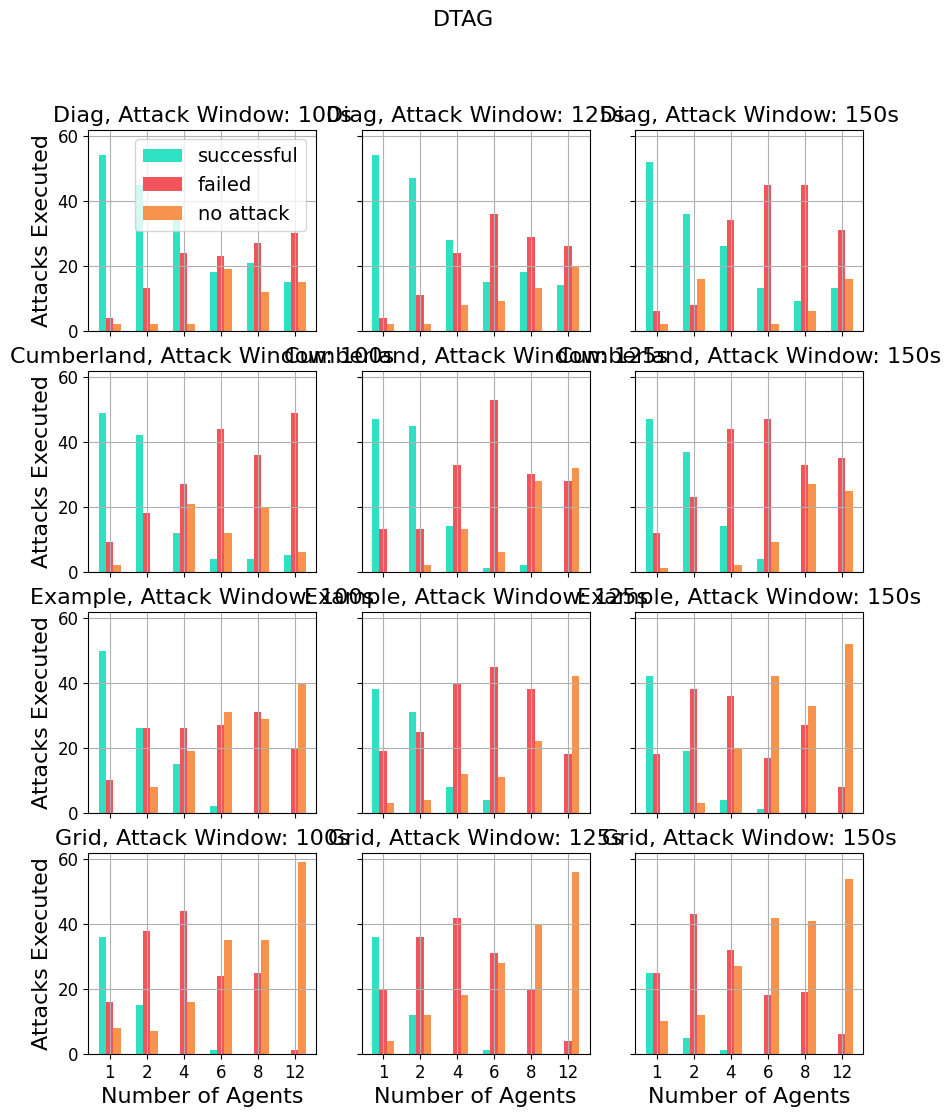

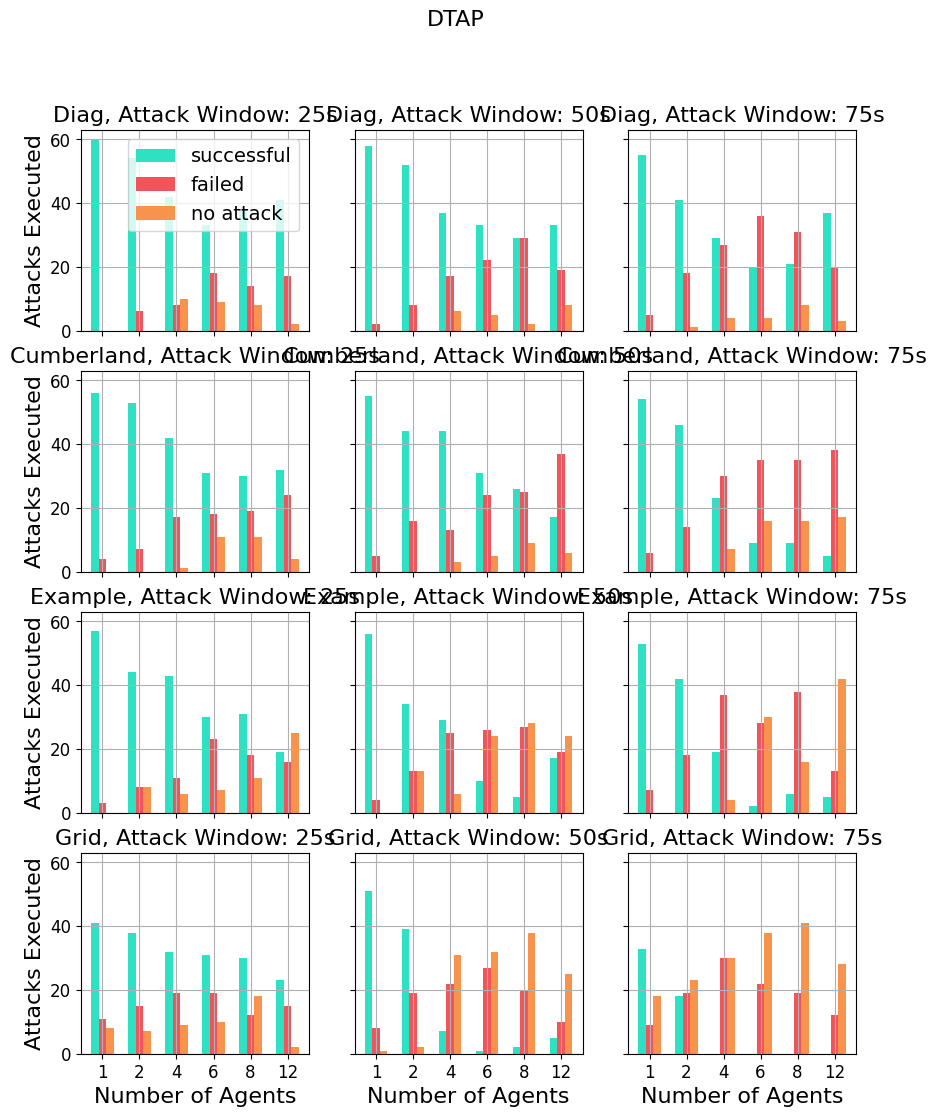

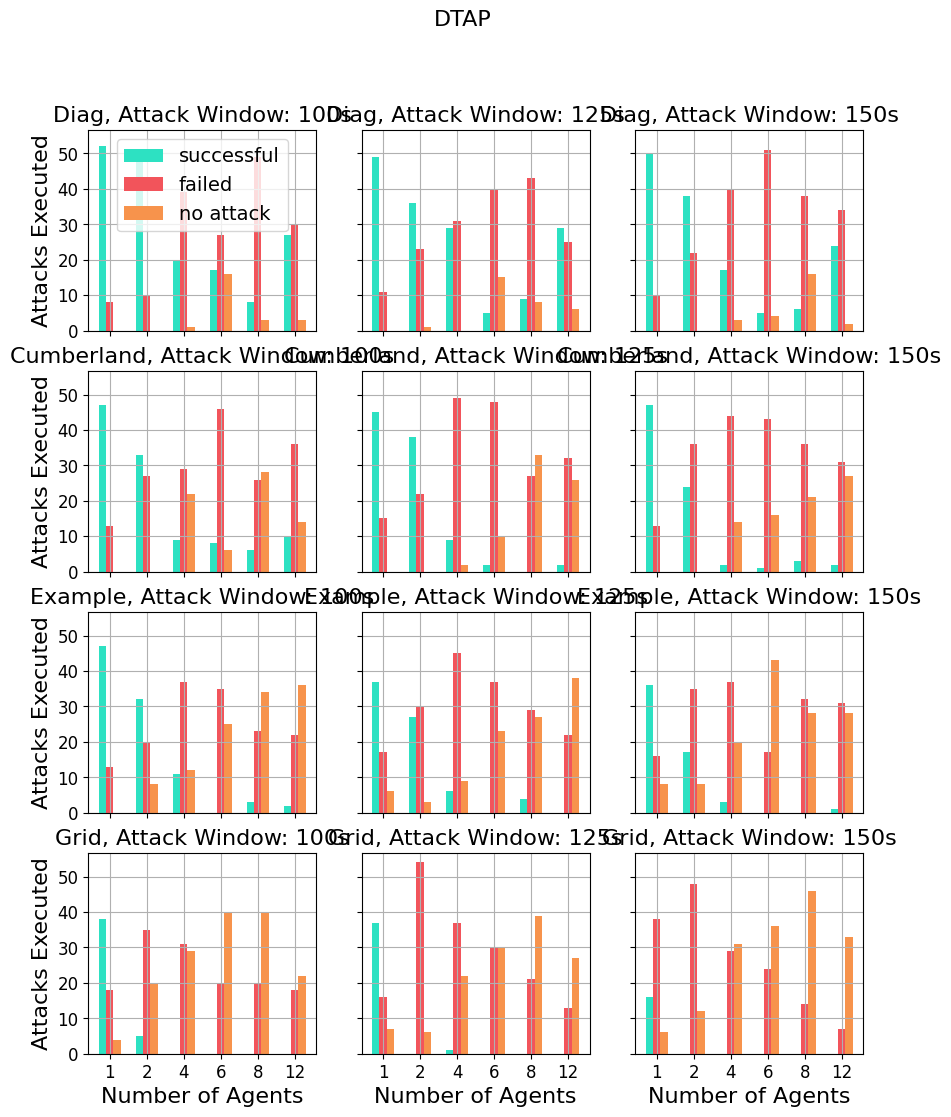

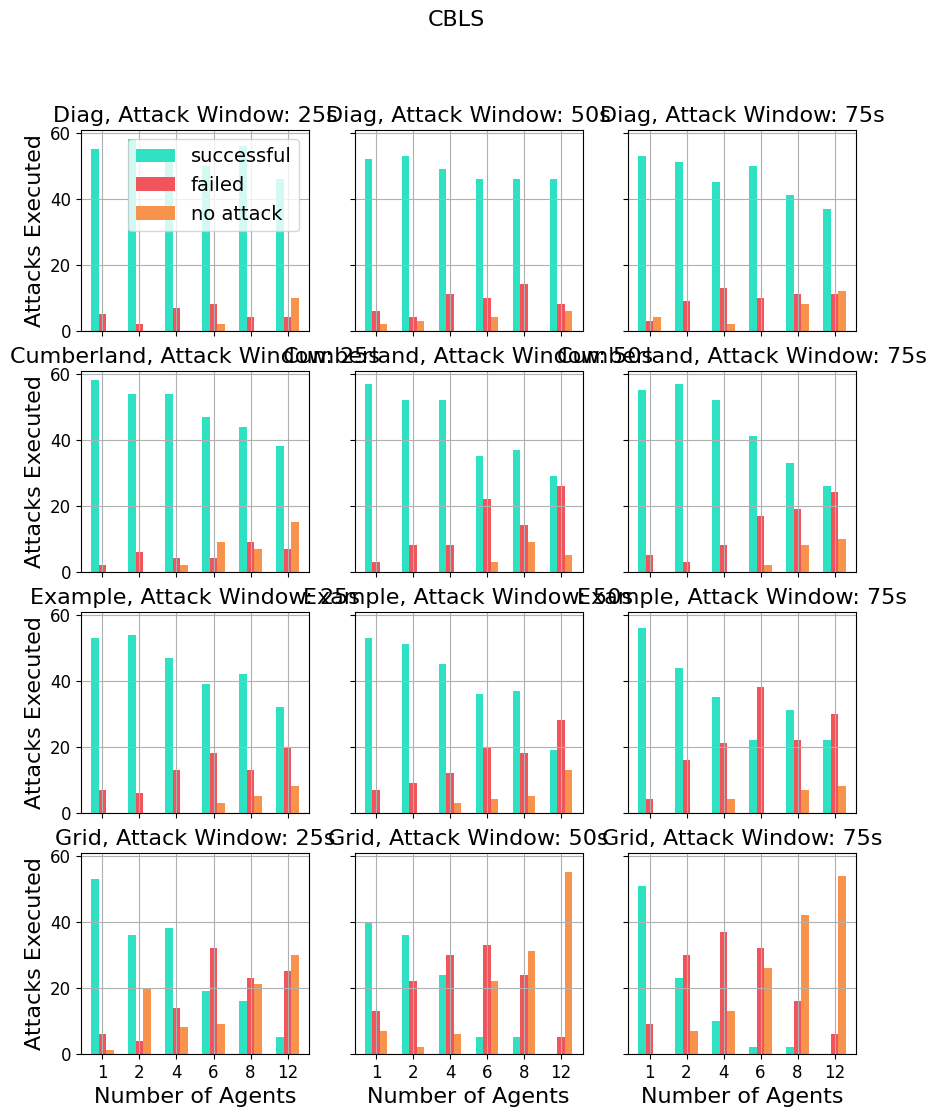

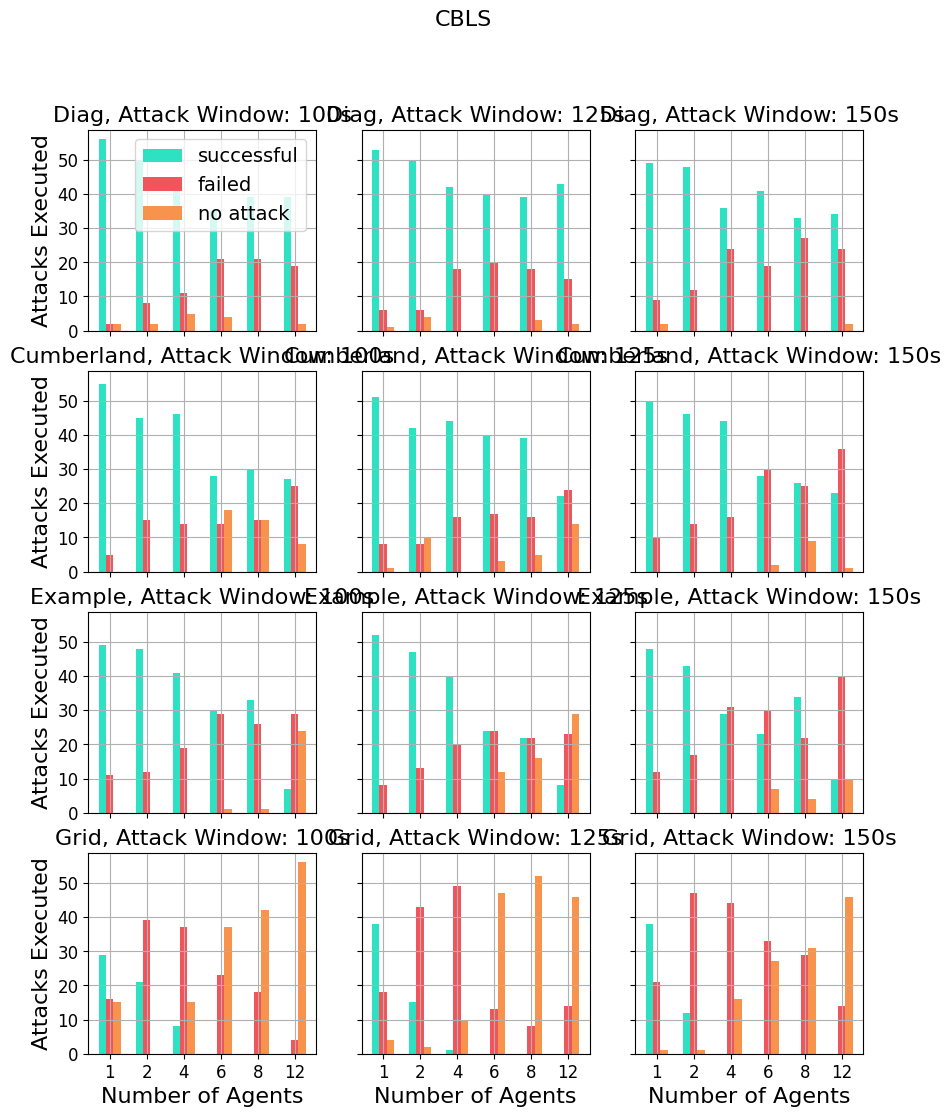

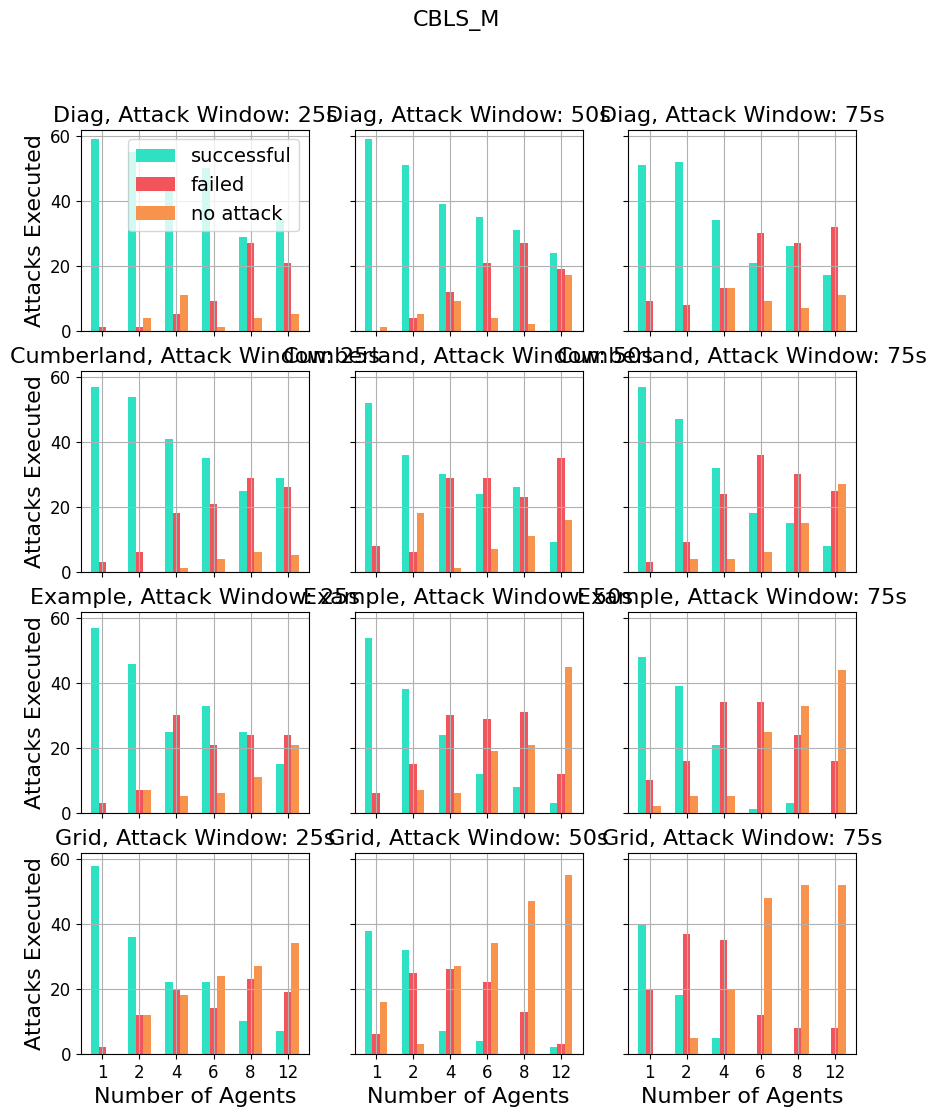

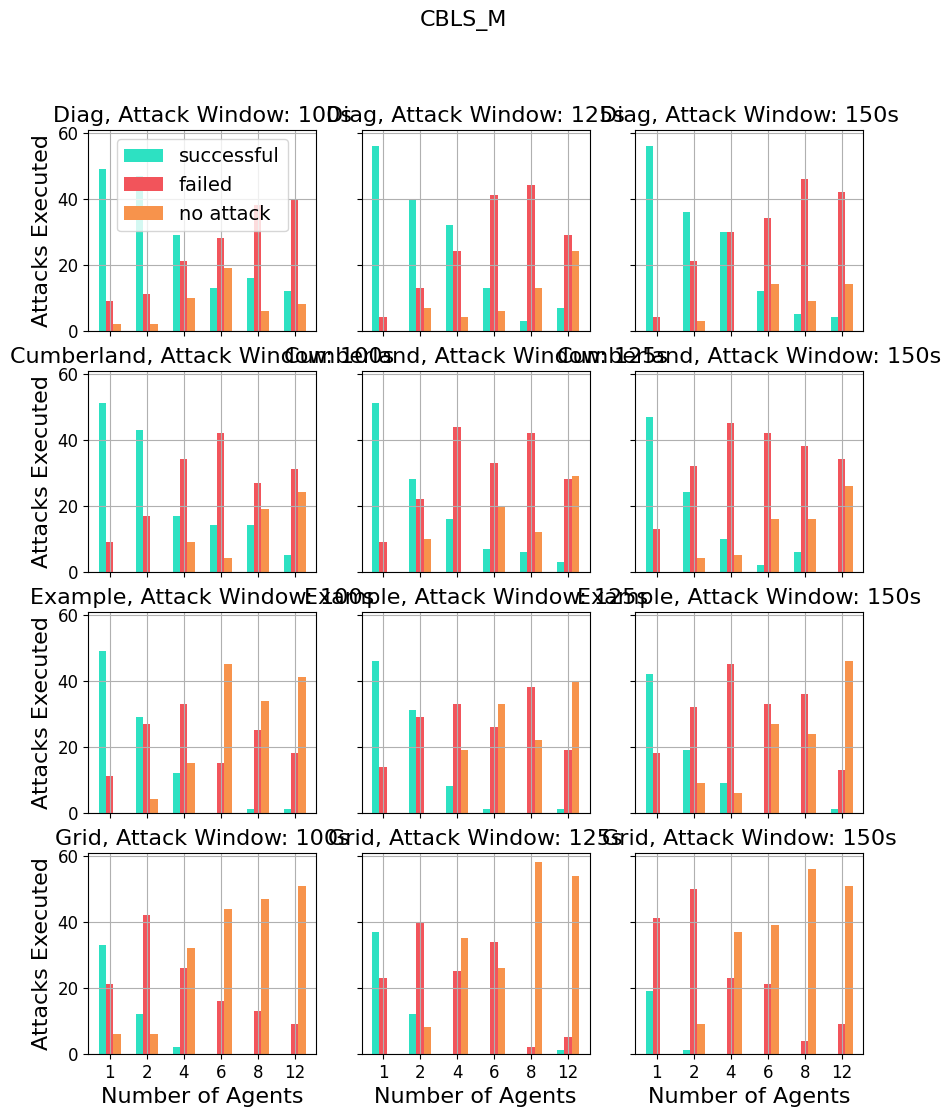

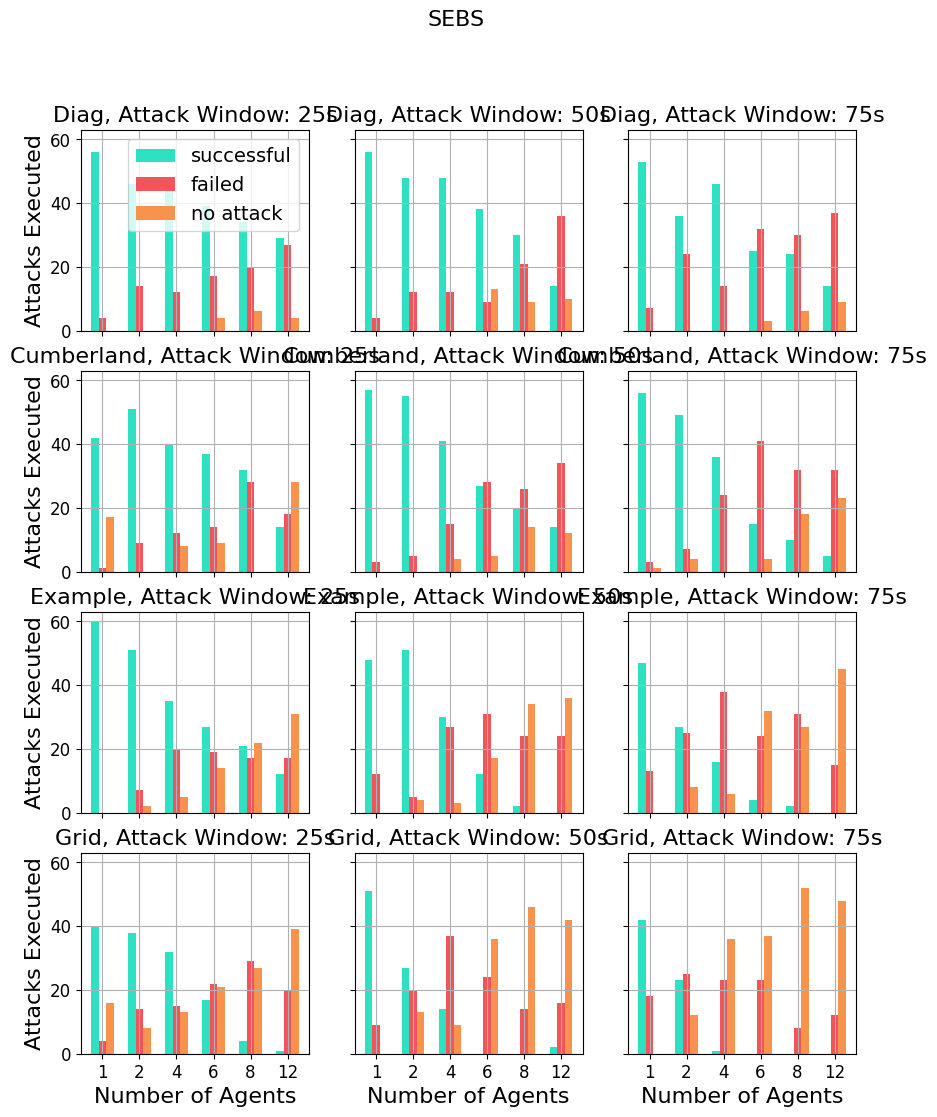

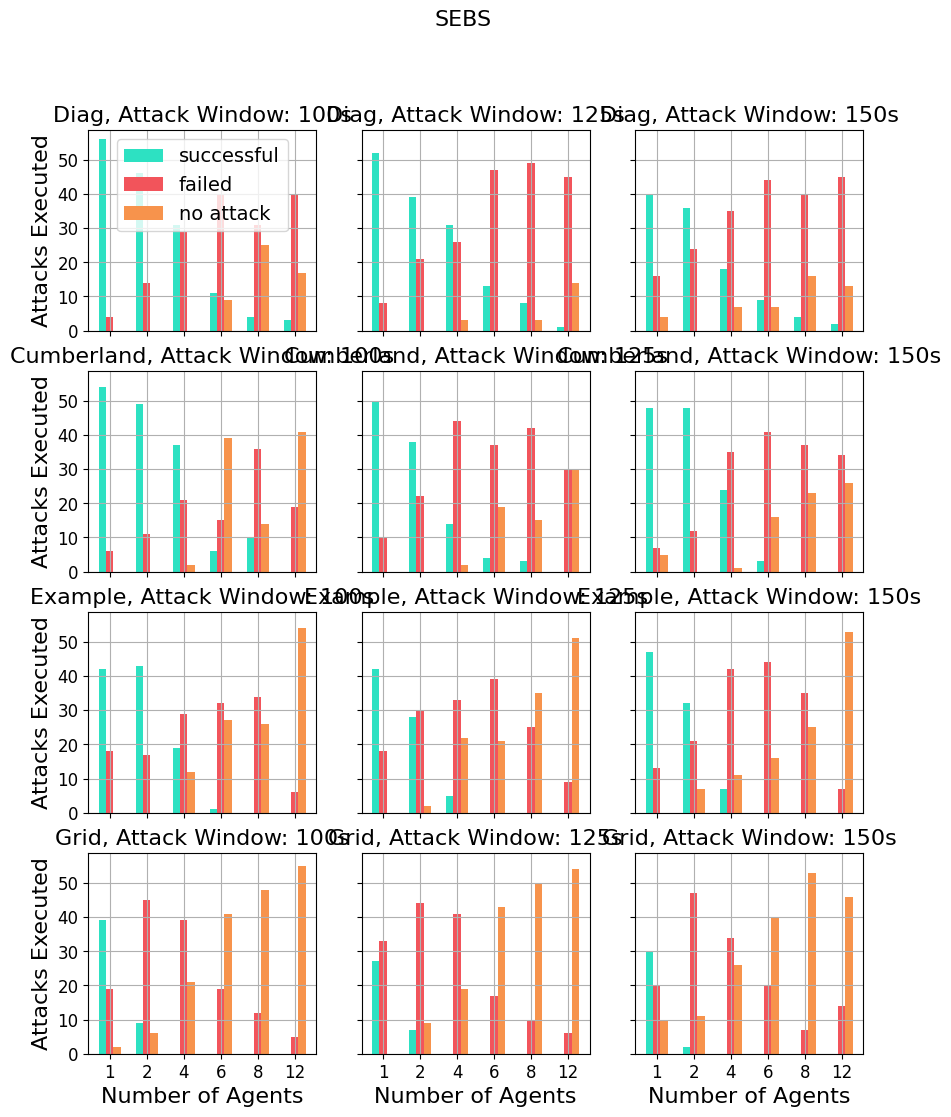

In [39]:
import matplotlib.pyplot as plt
import numpy as np

successful_counts = successful_counts_dict[aw]
total_counts = total_counts_dict[aw]

agents = np.arange(1, 7)
maps = ['Diag', 'Cumberland', 'Example', 'Grid']
names =  ['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents']


for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):

    for l in range(2):
    # Create subplots
        fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 12), sharex=True, sharey=True)

        for k, aw in enumerate(aw_values[l*3:l*3+3]):
            successful_counts = successful_counts_dict[aw]

            # Iterate over each subplot and plot the data
            # Iterate over each subplot and plot the data
            for i, map in enumerate(maps):
                col, row = divmod(i, 4)
                ax = axes[row, col+k%3]


                bar_width = 0.2
                gap = 0

                # Calculate positions for the two bars
                positions = agents - 1 * (bar_width + gap)

                color1 = '#2DE1C2'  # Replace with your desired color code
                color2 = '#F2545B'  # Replace with your desired color code
                color3 = '#F7934C'

                ax.bar(positions, successful_counts[j, i, :, 0], width=bar_width, color=color1, label = 'successful')
                ax.bar(positions + bar_width + gap, successful_counts[j, i, :, 1], width=bar_width, color=color2, label = 'failed')
                ax.bar(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], width=bar_width, color=color3, label = 'no attack')


                # ax.plot(agents, AW_agents[j, i, k%3+(l*3), :] / AW_agents_counts[j, i, k%3+(l*3),:], color=colours[j], label=algo, linewidth=5)

                ax.set_title(f'{map}, Attack Window: {aw}s', fontsize=axis_fontsize)
                ax.set_xticks(agents)
                ax.set_xticklabels([1,2,4,6,8,12])
                if (row==0)&(col+k%3==0):
                    ax.legend(fontsize=legend_fontsize)
                # ax.set_yticks(np.arange(0.1, 1.1, 0.1))
                # ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

                ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
                ax.grid()
                
                # fig.suptitle(f'{map}, {names[k]}', fontsize=axis_fontsize)



        axes[0, 0].set_ylabel('Attacks Executed', fontsize=axis_fontsize)
        axes[1, 0].set_ylabel('Attacks Executed', fontsize=axis_fontsize)
        axes[2, 0].set_ylabel('Attacks Executed', fontsize=axis_fontsize)
        axes[3, 0].set_ylabel('Attacks Executed', fontsize=axis_fontsize)

        # Set the x-axis label for the bottom subplots

        axes[3, 0].set_xlabel('Number of Agents', fontsize=axis_fontsize)
        axes[3, 1].set_xlabel('Number of Agents', fontsize=axis_fontsize)
        axes[3, 2].set_xlabel('Number of Agents', fontsize=axis_fontsize)


        fig.suptitle(algo, fontsize=16)

        # plt.grid
        # plt.tight_layout()  
        # if l == 0:
        #     save_path = os.path.join('plots', f'attack_counts_{algo}_lower.png')
        # else:
        #     save_path = os.path.join('plots', f'attack_counts_{algo}_upper.png')
        # plt.savefig(save_path)
        # plt.show()
        # plt.close(fig)


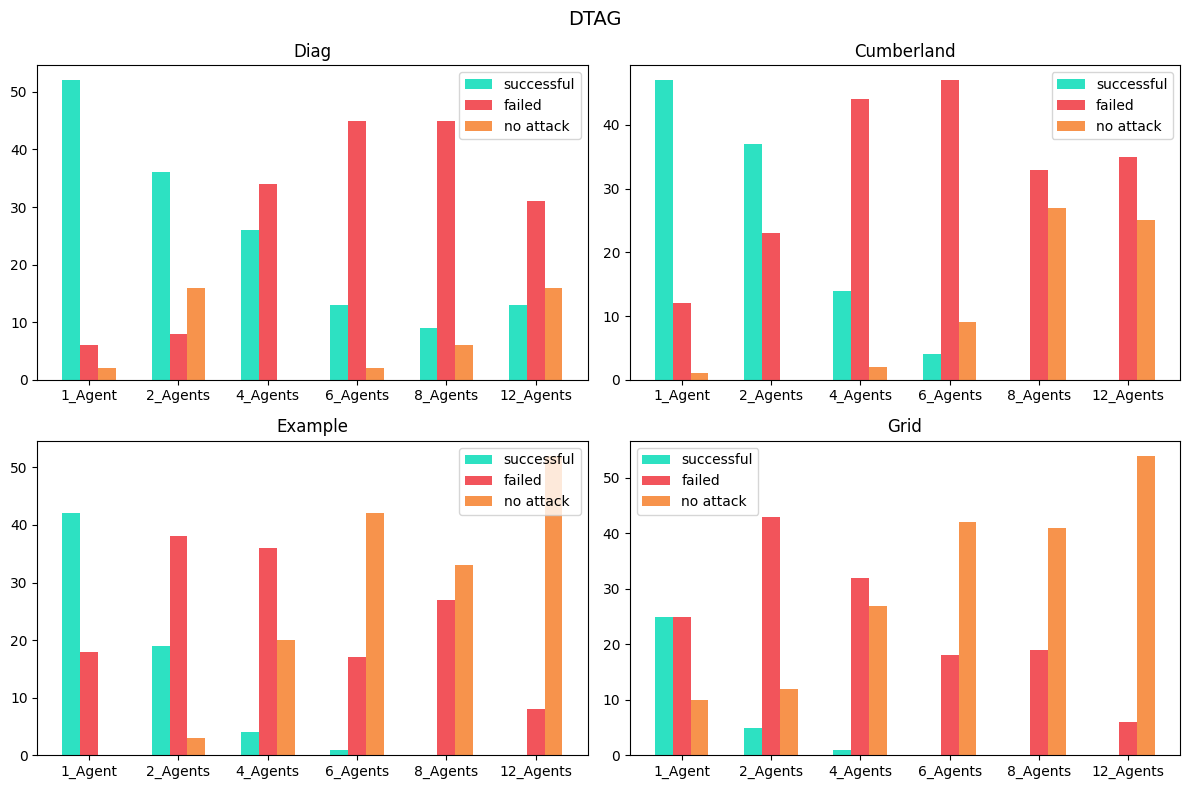

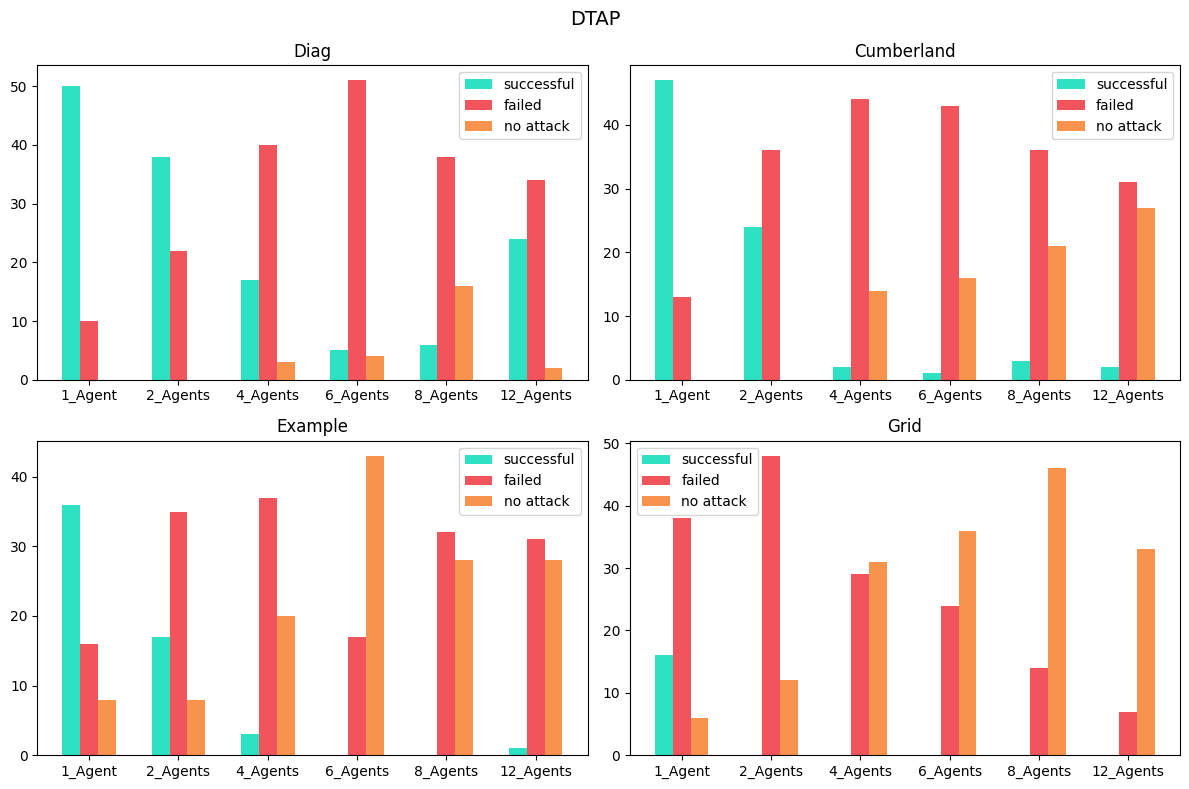

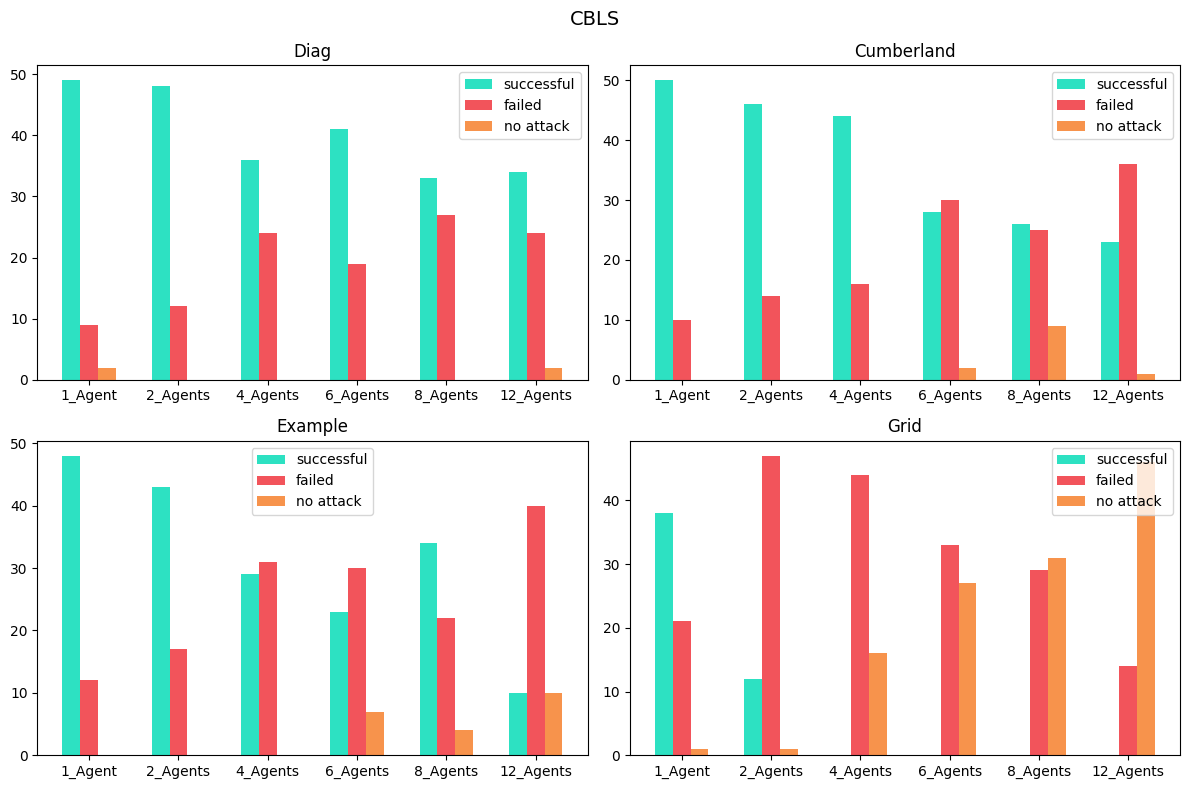

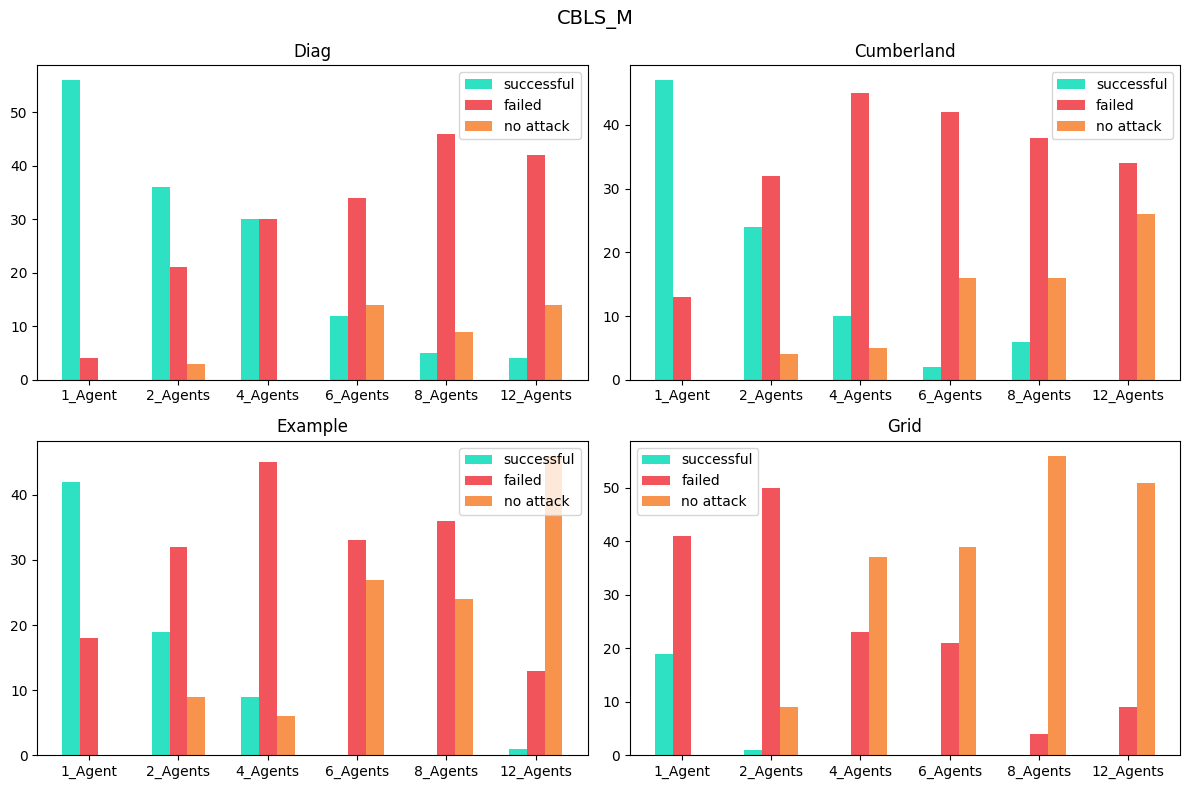

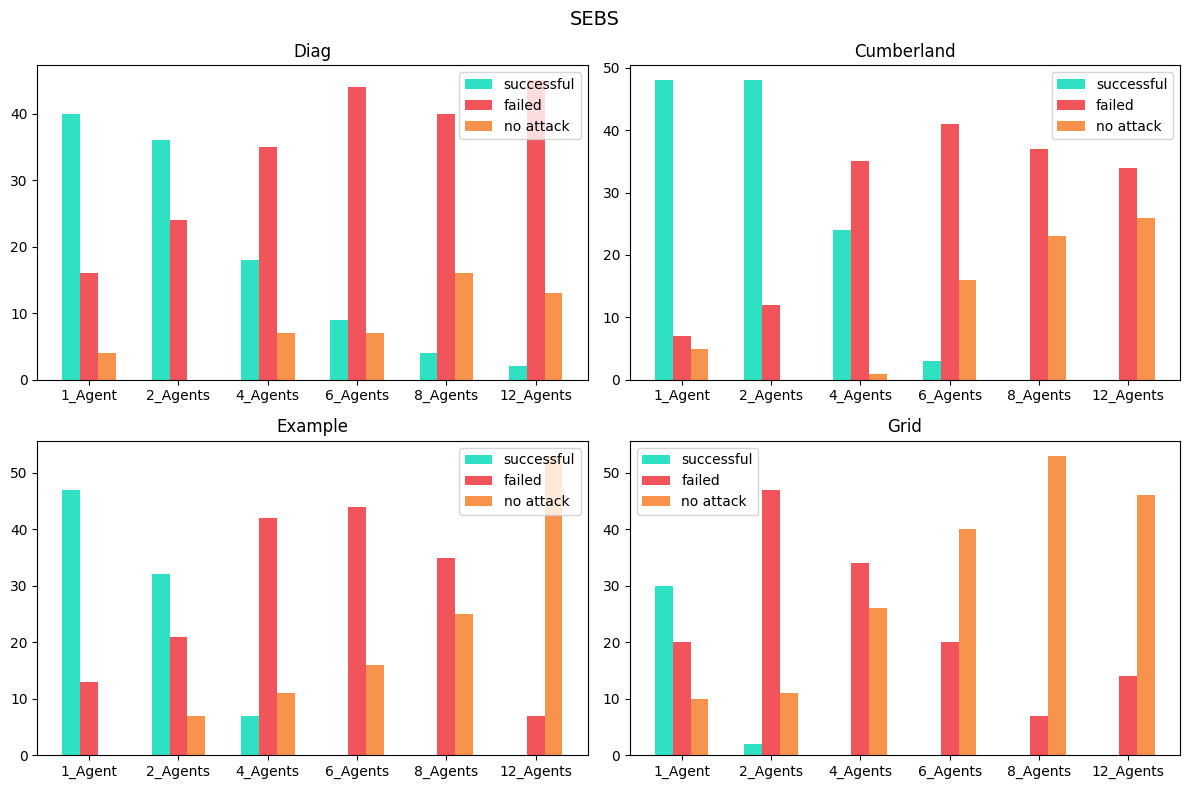

In [40]:
import matplotlib.pyplot as plt
import numpy as np


for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
# for j, algo in enumerate(['DTAG']):


    agents = np.arange(1, 7)
    maps = ['Diag', 'Cumberland', 'Example', 'Grid']

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        bar_width = 0.2
        gap = 0

        # Calculate positions for the two bars
        positions = agents - 1 * (bar_width + gap)

        color1 = '#2DE1C2'  # Replace with your desired color code
        color2 = '#F2545B'  # Replace with your desired color code
        color3 = '#F7934C'

        ax.bar(positions, successful_counts[j, i, :, 0], width=bar_width, color=color1, label = 'successful')
        ax.bar(positions + bar_width + gap, successful_counts[j, i, :, 1], width=bar_width, color=color2, label = 'failed')
        ax.bar(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], width=bar_width, color=color3, label = 'no attack')

        # ax.plot(positions, successful_counts[j, i, :, 0], marker='o', color=color1, label='successful')
        # ax.plot(positions + bar_width + gap, successful_counts[j, i, :, 1], marker='o', color=color2, label='failed')
        # ax.plot(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], marker='o', color=color3, label='no attack')

        # Plot bars for each month
        # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
        ax.set_title(map)
        ax.set_xticks(agents)
        ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
        ax.legend()

    # Adjust layout and show the plot

    fig.suptitle(algo, fontsize=14)
    plt.grid
    plt.tight_layout()
    plt.show()


In [41]:
# average_times = np.zeros((5,4,6))


# for algo in range(5):
#     for j, data in enumerate(dataset[algo,0,:,:]):
#         for i in range(len(data)):
#             if str(data[i]) != 'nan':
#                 average_times[algo,j//18,j%18//3] += (data[i]/(dataset.shape[1]*dataset.shape[-1]))
#             else:
#                 average_times[algo,j//18,j%18//3] += (2000/(dataset.shape[1]*dataset.shape[-1]))

# average_times[2][1]

In [42]:
# import matplotlib.pyplot as plt
# import numpy as np


# for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
# # for j, algo in enumerate(['DTAG']):


#     agents = np.arange(1, 7)
#     maps = ['Diag', 'Cumberland', 'Example', 'Grid']

#     # Create subplots
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#     # Iterate over each subplot and plot the data
#     for i, map in enumerate(maps):
#         row, col = divmod(i, 2)
#         ax = axes[row, col]

#         bar_width = 0.2
#         gap = 0

#         # Calculate positions for the two bars
#         positions = agents

#         color1 = '#1D70A2'  # Replace with your desired color code

#         ax.plot(positions, average_times[j, i, :], marker='o', color=color1, label='average time')

#         # Plot bars for each month
#         # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
#         ax.set_title(map)
#         ax.set_xticks(agents)
#         ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
#         ax.legend()

#     # Adjust layout and show the plot

#     fig.suptitle(algo, fontsize=14)
#     plt.grid
#     plt.tight_layout()
#     plt.show()
